In [1]:
import matplotlib.pyplot as plt
import numpy as np
# helper functions from last 2 exercises including `clip`
from lec3ex3_helper import f, der_f, FUNC_RANGE, get_tangent_line, plot_it, clip
%matplotlib inline

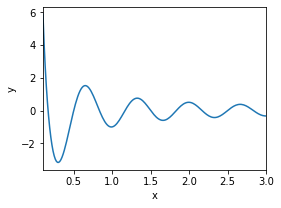

In [2]:
x = np.linspace(*FUNC_RANGE, 200)
fig, ax = plt.subplots(figsize=(4,3))
plt.plot(x,f(x))
plt.xlim(x.min(), x.max());
plt.xlabel('x')
plt.ylabel('y');

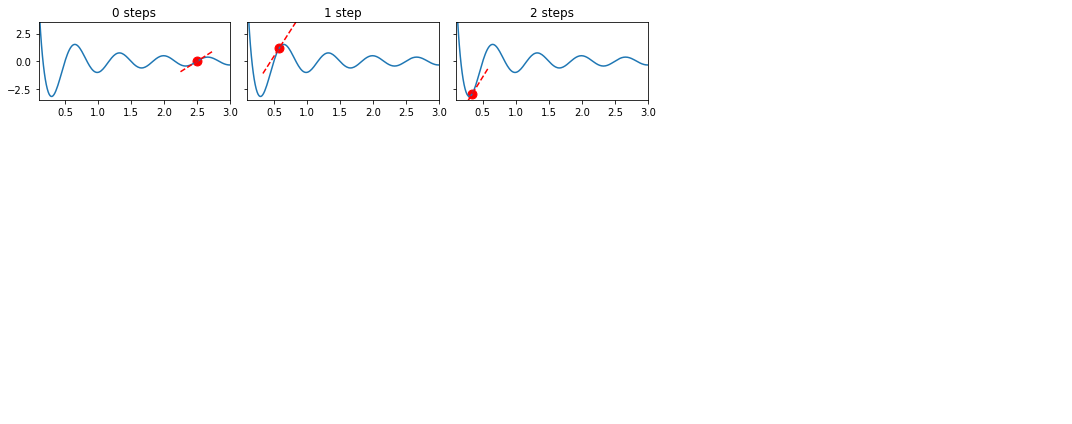

In [34]:
fig, axs = plt.subplots(4,5, figsize=(15,6), sharey=True)

cur_x = 2.5 # initial value of x

learning_rate = 0.95
decay_rate = 0.05 # percent by which learning rate decays each step
epsilon = 0.05 # marks convergence
nu = 0 # initially, momentum has no 'memory'
alpha = 0.465 # momentum weighting parameter

for i, ax in enumerate(axs.ravel()):
    plot_it(cur_x, title=f"{i} step{'' if i == 1 else 's'}", ax=ax)
    
    prev_x = cur_x
    
    g = clip(der_f(cur_x))
    nu = alpha * nu + (1-alpha)*g
    
    cur_x = cur_x - nu * learning_rate
    learning_rate = learning_rate * decay_rate
    
    
    
    # stop algorithm if change below threshold
    if np.abs(cur_x - prev_x) <= epsilon:
        for ax in axs.ravel()[i+1:]:
            ax.axis('off') # hide unused subplots
        break
plt.tight_layout()

What about higher dimensions?

Try a list of different alpha values with a single learning rate and see how that affects convergence in 2 dimensions.

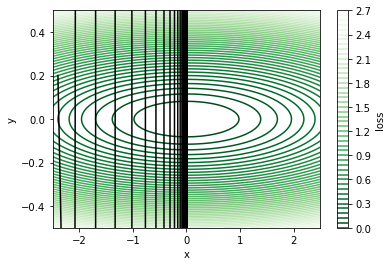

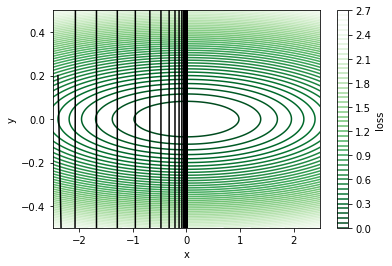

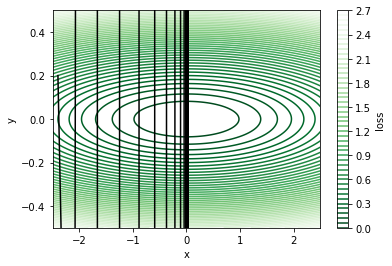

In [38]:
from loss_surface import LossSurface
from momentum import Momentum, visualize_descent

learning_rate = 1
iteration = 50
alphas = [0.4,0.45,0.50] # a list of floats

visualize_descent(learning_rate=learning_rate, iteration=iteration, alphas=alphas)